In [8]:
# Market Segmentation - Case Study on McDonald's

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Step 4: Exploring the Data
# Load Dataset
data = pd.read_csv("mcdonalds.csv")

# Display basic information
data_info = data.info()
data_head = data.head()
print(data_info)
print(data_head)

# Checking dimensions of the dataset
data_shape = data.shape
print(f"Dataset Dimensions: {data_shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No

C:\Users\sudharshan\AppData\Local\Temp\ipykernel_21836\3865953166.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data[categorical_features].replace({'Yes': 1, 'No': 0})


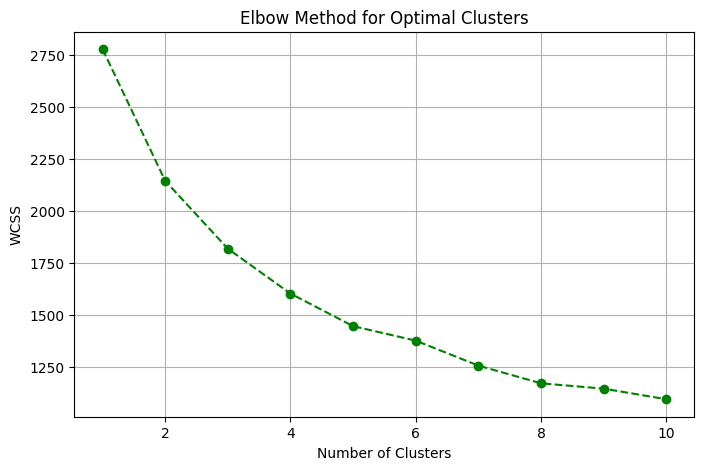

Cluster Centers:
      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.020833    0.679167  0.079167   0.916667  0.708333  0.745833  0.066667   
1  0.887931    0.981034  0.086207   0.794828  0.329310  0.960345  0.922414   
2  0.022654    0.893204  0.077670   0.925566  0.660194  0.951456  0.919094   
3  0.851852    0.959877  0.132716   0.904321  0.617284  0.858025  0.108025   

      tasty  expensive   healthy  disgusting  
0  0.083333   0.895833  0.062500    0.729167  
1  0.975862   0.017241  0.320690    0.043103  
2  0.155340   0.012945  0.071197    0.385113  
3  0.932099   0.898148  0.203704    0.104938  


In [9]:
# Step 5: Extracting Market Segments (Using K-Means Clustering)
# Converting categorical variables to numerical
categorical_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data_encoded = data[categorical_features].replace({'Yes': 1, 'No': 0})

# Determining optimal clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_encoded)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='green')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Applying K-Means with chosen clusters (e.g., 4)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans_final.fit_predict(data_encoded)

# Displaying cluster centers
cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_, columns=categorical_features)
print("Cluster Centers:")
print(cluster_centers)

Segment Profiles:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.020833    0.679167  0.079167   0.916667  0.708333  0.745833   
1        0.887931    0.981034  0.086207   0.794828  0.329310  0.960345   
2        0.022654    0.893204  0.077670   0.925566  0.660194  0.951456   
3        0.851852    0.959877  0.132716   0.904321  0.617284  0.858025   

            cheap     tasty  expensive   healthy  disgusting  Cluster  
Cluster                                                                
0        0.066667  0.083333   0.895833  0.062500    0.729167      0.0  
1        0.922414  0.975862   0.017241  0.320690    0.043103      1.0  
2        0.919094  0.155340   0.012945  0.071197    0.385113      2.0  
3        0.108025  0.932099   0.898148  0.203704    0.104938      3.0  


C:\Users\sudharshan\AppData\Local\Temp\ipykernel_21836\3137667789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=data, palette="viridis")


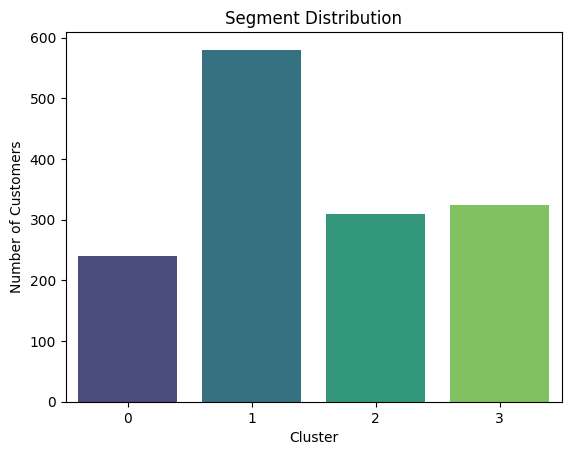

In [16]:
# Step 6: Profiling Market Segments
# Ensure all numeric columns before aggregation
data_cleaned = data_encoded.copy()
data_cleaned['Cluster'] = data['Cluster']  # Add the cluster column

# Verify data types to ensure all columns are numeric
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
segment_profiles = data_cleaned.groupby("Cluster")[numeric_columns].mean()
print("Segment Profiles:")
print(segment_profiles)

sns.countplot(x="Cluster", data=data, palette="viridis")
plt.title("Segment Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


Segment-Wise Summary:
               Age  VisitFrequency  Cluster
Cluster                                    
0        48.079167             NaN      0.0
1        43.470690             NaN      1.0
2        49.016181             NaN      2.0
3        39.854938             NaN      3.0


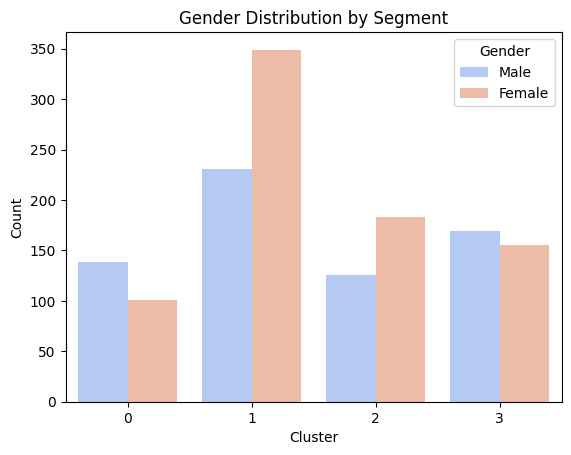

In [17]:
# Step 7: Describing Market Segments
# Converting Age and VisitFrequency to numeric
numeric_features = ['Age', 'VisitFrequency']
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

# Ensure only numeric columns are used for mean calculation
numeric_cols = data.select_dtypes(include=[np.number]).columns
segment_summary = data.groupby("Cluster")[numeric_cols].mean()
print("Segment-Wise Summary:")
print(segment_summary)

# Gender distribution per segment
sns.countplot(x="Cluster", hue="Gender", data=data, palette="coolwarm")
plt.title("Gender Distribution by Segment")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

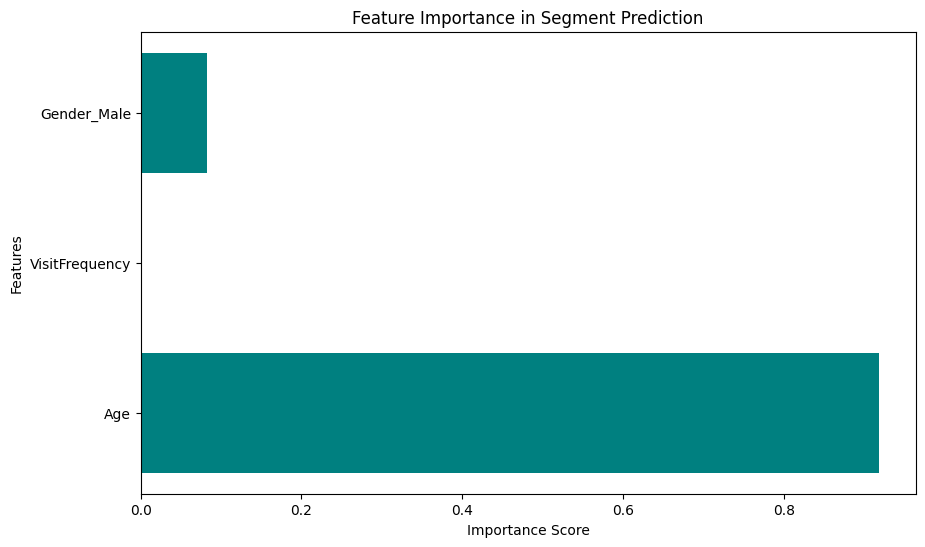

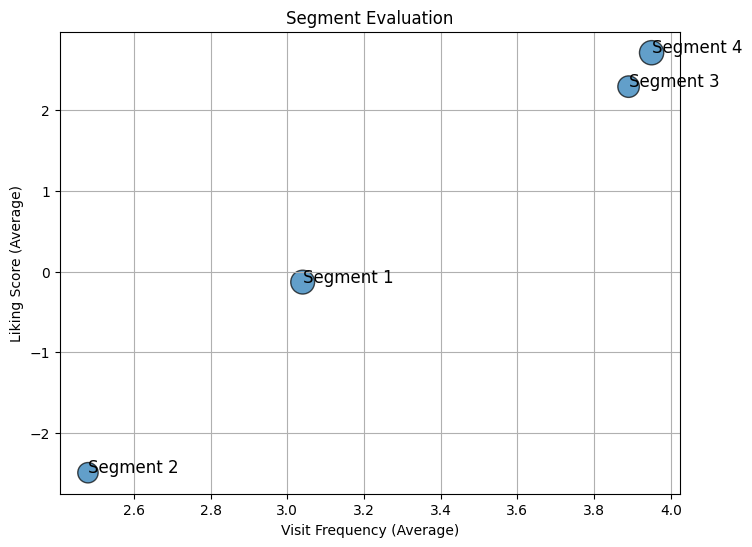

In [18]:
# Step 8: Selecting the Target Segment
# Training a Decision Tree to analyze segment descriptors
descriptor_vars = ['Age', 'VisitFrequency', 'Gender']
X = pd.get_dummies(data[descriptor_vars], drop_first=True)
y = data['Cluster']

# Fitting a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, tree_model.feature_importances_, color='teal')
plt.title("Feature Importance in Segment Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Visualizing segment evaluation
visit_frequency_avg = [3.04, 2.48, 3.89, 3.95]
liking_scores_avg = [-0.13, -2.49, 2.29, 2.71]
female_percentage = [0.59, 0.43, 0.48, 0.61]
bubble_sizes = [size * 500 for size in female_percentage]

plt.figure(figsize=(8, 6))
plt.scatter(visit_frequency_avg, liking_scores_avg, s=bubble_sizes, alpha=0.7, edgecolors="black")
plt.title("Segment Evaluation")
plt.xlabel("Visit Frequency (Average)")
plt.ylabel("Liking Score (Average)")
for i, txt in enumerate(["Segment 1", "Segment 2", "Segment 3", "Segment 4"]):
    plt.annotate(txt, (visit_frequency_avg[i], liking_scores_avg[i]), fontsize=12)
plt.grid(True)
plt.show()